In [3]:
MODEL = 'fine_tuned/NER/ACD_15epochs'
MODEL_PATH = '../../models/word_embeddings/'
MODEL_PATH += MODEL

In [4]:
import os, json

config_name = 'trainer_state.json'
config_file = os.path.join(MODEL_PATH, config_name)
config_json = json.load(open(config_file))
epochs = config_json['log_history']

treino_perda = []
for e in epochs:
    treino_perda.append(e['loss'])

teste_perda = [2.069122314453125, 2.0268731117248535, 0.06653925031423569, 0.03552987053990364, 0.021754520013928413, 0.01020291168242693, 0.007560146506875753, 0.005515111610293388, 0.0030074850656092167, 0.002318189013749361, 0.0020072823390364647, 0.0011709571117535233, 0.0011993682710453868, 0.0010302491718903184, 0.0008933630306273699, 0.0007379970047622919, 0.0006974624702706933]

['bert', 'biobert', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


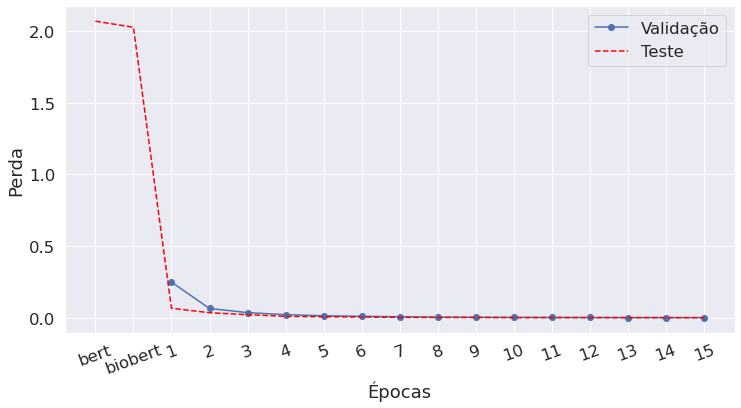

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

indices = [i+1 for i, v in enumerate(treino_perda)]
df = pd.DataFrame({'x': indices, 'perda': treino_perda})
plt.plot(df['x'], df['perda'], 'b-o', label='Validação')

indices = [i-1 for i, v in enumerate(teste_perda)]
df = pd.DataFrame({'x': indices, 'perda': teste_perda})
plt.plot(df['x'], df['perda'], '--', color='red', label='Teste')

xs = ['bert', 'biobert']
[xs.append(x) for x in range(1,16)]
print(xs)
print(np.arange(-1, 16, step=1))
plt.xticks(np.arange(-1, 16, step=1), xs, rotation='20')


plt.xlabel("Épocas")
plt.ylabel("Perda")


plt.legend()
plt.savefig('perda.png', format='png')
plt.show()


In [70]:
precisions = [0.029211815142139656, 0.022912548516022913, 0.8713295269168027, 0.9219305900516883, 0.9444965184788431, 0.9787644787644788, 0.9821748107364074, 0.9877787751156528, 0.9949302034863532, 0.9965251233581208, 0.9968033356497568, 0.9988857938718663, 0.9981910526681973, 0.9983299700786306, 0.9991640543364682, 0.9993037666225719, 0.9994428969359331]                   
recalls = [0.29326554774009334, 0.2211853193119298, 0.8927501915175151, 0.9564732920119785, 0.9824500313392297, 0.988648234556724, 0.9938714395152866, 0.9963089351626158, 0.9977017898182324, 0.9986071453443833, 0.9989553590082875, 0.9989553590082875, 0.99916428720663, 0.99916428720663, 0.9988857162755066, 0.999582143603315, 0.9995125008705341]
f_measures = [0.05313128891636648, 0.04152366757532375, 0.8819098070241822, 0.938884331419196, 0.9630995050349888, 0.983681529986488, 0.9879885077365087, 0.9920255183413078, 0.9963140691285903, 0.9975650480033393, 0.9978781870673762, 0.9989205752289425, 0.9986774328275094, 0.998746954403063, 0.9990248659190639, 0.9994429357287097, 0.9994776976914237]
accucaricies = []

['bert', 'biobert', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


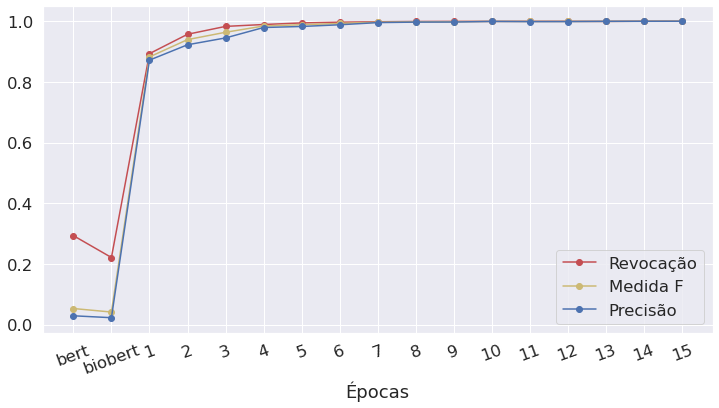

In [71]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)


# plt.xticks(np.arange(len(precisions)), np.arange(1, len(precisions)+1))

plt.plot(recalls, 'r-o', label="Revocação")
plt.plot(f_measures, 'y-o', label="Medida F")
plt.plot(precisions, 'b-o', label="Precisão")

xs = ['bert', 'biobert']
[xs.append(x) for x in range(1,16)]
print(xs)
# print(np.arange(0, 15, step=1))
plt.xticks(np.arange(0, 17, step=1), xs, rotation='20')


# plt.title("Curva de Perda")
plt.xlabel("Épocas")
plt.legend()

plt.savefig('performance.png', format='png')
plt.show()


NameError: name 'valid_perda' is not defined

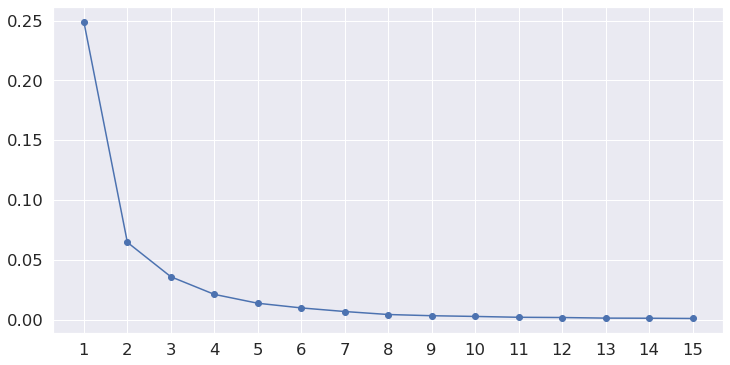

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# plt.xticks(np.arange(len(valid_perda)), np.arange(-1, len(valid_perda)-1))
plt.xticks(np.arange(len(treino_perda)), np.arange(1, len(treino_perda)+1))


# Plot the learning curve.
plt.plot(treino_perda, 'b-o', label="Treinamento")
plt.plot(valid_perda, 'r-o', label="Teste")

# Label the plot.
# plt.title("Curva de Perda")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.savefig('perda.eps', format='eps')
plt.show()


## Performance

In [ ]:
from typing import Dict
from transformers import AutoConfig
# List, Optional, Tuple

def get_labels(path):
    
    # path= '../../NER/ACD/labels.txt'
    with open(path, "r") as f:
        labels = f.read().splitlines()
        labels = [i if i != 'O' else 'O' for i in labels]
    if "O" not in labels:
        labels = ["O"] + labels
    return labels

labels = get_labels('../../datasets/NER/ACD/labels.txt')
num_labels = len(labels)
label_map: Dict[int, str] = {i: label for i, label in enumerate(labels)}

config = AutoConfig.from_pretrained(MODEL_PATH,
    num_labels=num_labels,
    id2label=label_map,
    label2id={label: i for i, label in enumerate(labels)},
)
print(config)

In [16]:
# from transformers import AutoModelForTokenClassification

# model = AutoModelForTokenClassification.from_pretrained(
#     MODEL_PATH,
#     from_tf=bool(".ckpt" in MODEL),
#     config=config
# )

In [17]:
# model.eval()
# # Reset the validation loss for this epoch.
# devel_loss, devel_accuracy = 0, 0
# nb_devel_steps, nb_devel_examples = 0, 0
# predictions , true_labels = [], []

# print('len(devel_dataloader) ',len(devel_dataloader))
# for batch in devel_dataloader:
# #     print('len(batch) ',len(batch))
#     batch = tuple(t.to(device) for t in batch)
#     b_input_ids, b_input_mask, b_labels = batch
#     print('b_input_ids ', b_input_ids)
#     print('b_input_mask ', b_input_mask)
#     print('b_labels ', b_labels)

#     # Telling the model not to compute or store gradients,
#     # saving memory and speeding up validation
#     with torch.no_grad():
#         outputs = model(b_input_ids, token_type_ids=None,
#                         attention_mask=b_input_mask, labels=b_labels)
#     print('outputs[0] ', outputs[0])
#     print('outputs[0].mean() ', outputs[0].mean())

#     # Calculate the accuracy for this batch of test sentences.
#     devel_loss += outputs[0].mean().item()
# #     print(devel_loss)
#     predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
# #     true_labels.extend(label_ids)
#     break

# print('devel_loss ',devel_loss)

# devel_loss = devel_loss / len(devel_dataloader)
# print('devel_loss ',devel_loss)
# print('len(devel_dataloader) ',len(devel_dataloader))

# print("Devel loss: {}".format(devel_loss))
# pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
#                               for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
# valid_tags = [tag_values[l_i] for l in true_labels
#                               for l_i in l if tag_values[l_i] != "PAD"]
# print("Devel Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
# print("Devel F1-Score: {}".format(f1_score([pred_tags], [valid_tags])))
# print()


NameError: name 'devel_dataloader' is not defined

# Perda por numero de classes

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rend

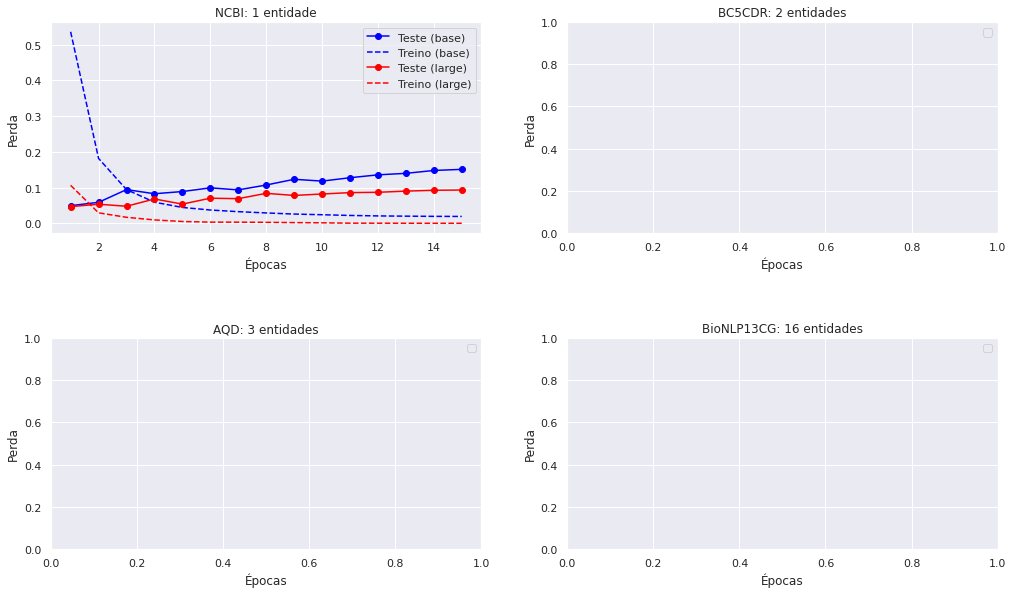

In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
# plt.rcParams.update({'font.size': 5})
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
# sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (14,8)

indices = np.arange(1, 16, step=1)

# NCBI
# perda_treino=[0.242, 0.0422, 0.0222, 0.0135, 0.008, 0.0054, 0.0037, 0.0027, 0.0021, 0.0016, 0.0013, 0.0013, 0.0009, 0.0008, 0.0007]
# perda_treino_lr_5e-5 = [0.0605,0.0253,0.0144,0.0084,0.0065,0.0052,0.0041,0.0025,0.002,0.002,0.0008,0.0004,0.0004,0.0005,0.0003]
perda_treino_lr_1e5 = [0.5358,0.1815,0.0943,0.0591,0.0444,0.0372,0.0326,0.029,0.0259,0.024,0.022,0.0207,0.02,0.0195,0.0192]

# perda_teste = [0.11346697807312012, 0.055551912635564804, 0.04354406148195267, 0.042623959481716156, 0.043783463537693024, 0.048358239233493805, 0.051372312009334564, 0.05360308289527893,0.0572509728372097, 0.0632767304778099, 0.06852328032255173,0.07245273888111115,0.07431916147470474, 0.07688311487436295, 0.07955699414014816]
perda_teste = [0.04934130981564522,0.05874865874648094,0.09429509192705154,0.08273377269506454,0.08888518065214157,
               0.09925306588411331,0.0934862568974495,0.10709076374769211,0.12316763401031494,0.11807524412870407,
               0.12752602994441986,0.1355993002653122,0.13980543613433838,0.14783574640750885,0.15096993744373322]

perda_treino_large=[0.1062, 0.0293, 0.0168, 0.0095, 0.0051, 0.0033, 0.0032, 0.0028, 0.002, 0.0014, 0.0004, 0.0003, 0.0002, 0.0001, 0.0001]
perda_teste_large = [0.04673603177070618, 0.05343064293265343, 0.04774734377861023, 0.06812098622322083,0.0537053644657135, 0.07026097178459167, 0.06891816854476929, 0.08388172090053558,0.07797511667013168, 0.08200062811374664, 0.08584363758563995, 0.08676780760288239,0.09008458256721497, 0.09243257343769073, 0.09316516667604446]

df1treino = pd.DataFrame({'x': indices, 'perda': perda_treino_lr_1e5})
df1teste = pd.DataFrame({'x': indices, 'perda': perda_teste})
df1treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large})
df1teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large})

ax[0][0].plot(df1teste['x'], df1teste['perda'], 'b-o', color='blue', label='Teste (base)')
ax[0][0].plot(df1treino['x'], df1treino['perda'], '--', color='blue', label='Treino (base)')

ax[0][0].plot(df1teste_large['x'], df1teste_large['perda'], 'r-o', color='red', label='Teste (large)')
ax[0][0].plot(df1treino_large['x'], df1treino_large['perda'], '--', color='red', label='Treino (large)')

ax[0][0].set_xlabel("Épocas")
ax[0][0].set_ylabel("Perda")
ax[0][0].legend()
ax[0][0].title.set_text("NCBI: 1 entidade")


# TrainerState(epoch=15.0, global_step=23835, max_steps=23835, num_train_epochs=15, total_flos=7886283579475200.0, log_history=[{'loss': 0.0605, 'learning_rate': 4.666666666666667e-05, 'epoch': 1.0, 'step': 1589}, {'eval_loss': 0.04934130981564522, 'eval_precision': 0.813640730067243, 'eval_recall': 0.8822916666666667, 'eval_f1': 0.8465767116441779, 'eval_accuracy': 0.982242723598808, 'eval_matrix': [[861, 62, 37], [18, 1003, 66], [129, 123, 22198]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.81      0.88      0.85       960\n\n   micro avg       0.81      0.88      0.85       960\n   macro avg       0.81      0.88      0.85       960\nweighted avg       0.81      0.88      0.85       960\n', 'eval_runtime': 24.8316, 'eval_samples_per_second': 37.935, 'epoch': 1.0, 'step': 1589}, {'loss': 0.0253, 'learning_rate': 4.3333333333333334e-05, 'epoch': 2.0, 'step': 3178}, {'eval_loss': 0.05874865874648094, 'eval_precision': 0.8166986564299424, 'eval_recall': 0.8864583333333333, 'eval_f1': 0.8501498501498502, 'eval_accuracy': 0.9827325794995305, 'eval_matrix': [[881, 33, 46], [32, 1007, 48], [117, 147, 22186]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.82      0.89      0.85       960\n\n   micro avg       0.82      0.89      0.85       960\n   macro avg       0.82      0.89      0.85       960\nweighted avg       0.82      0.89      0.85       960\n', 'eval_runtime': 24.7673, 'eval_samples_per_second': 38.034, 'epoch': 2.0, 'step': 3178}, {'loss': 0.0144, 'learning_rate': 4e-05, 'epoch': 3.0, 'step': 4767}, {'eval_loss': 0.09429509192705154, 'eval_precision': 0.860655737704918, 'eval_recall': 0.875, 'eval_f1': 0.8677685950413223, 'eval_accuracy': 0.9847736457525411, 'eval_matrix': [[856, 37, 67], [21, 994, 72], [84, 92, 22274]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.6785, 'eval_samples_per_second': 38.171, 'epoch': 3.0, 'step': 4767}, {'loss': 0.0084, 'learning_rate': 3.6666666666666666e-05, 'epoch': 4.0, 'step': 6356}, {'eval_loss': 0.08273377269506454, 'eval_precision': 0.8618556701030928, 'eval_recall': 0.8708333333333333, 'eval_f1': 0.8663212435233161, 'eval_accuracy': 0.9849777523778421, 'eval_matrix': [[846, 34, 80], [27, 994, 66], [75, 86, 22289]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.87      0.87       960\n\n   micro avg       0.86      0.87      0.87       960\n   macro avg       0.86      0.87      0.87       960\nweighted avg       0.86      0.87      0.87       960\n', 'eval_runtime': 24.4752, 'eval_samples_per_second': 38.488, 'epoch': 4.0, 'step': 6356}, {'loss': 0.0065, 'learning_rate': 3.3333333333333335e-05, 'epoch': 5.0, 'step': 7945}, {'eval_loss': 0.08888518065214157, 'eval_precision': 0.8598984771573605, 'eval_recall': 0.8822916666666667, 'eval_f1': 0.8709511568123393, 'eval_accuracy': 0.984936931052782, 'eval_matrix': [[856, 40, 64], [25, 991, 71], [92, 77, 22281]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.4507, 'eval_samples_per_second': 38.527, 'epoch': 5.0, 'step': 7945}, {'loss': 0.0052, 'learning_rate': 3e-05, 'epoch': 6.0, 'step': 9534}, {'eval_loss': 0.09925306588411331, 'eval_precision': 0.8338278931750742, 'eval_recall': 0.878125, 'eval_f1': 0.8554033485540335, 'eval_accuracy': 0.9830999714250724, 'eval_matrix': [[858, 40, 62], [26, 1006, 55], [109, 122, 22219]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.83      0.88      0.86       960\n\n   micro avg       0.83      0.88      0.86       960\n   macro avg       0.83      0.88      0.86       960\nweighted avg       0.83      0.88      0.86       960\n', 'eval_runtime': 24.5373, 'eval_samples_per_second': 38.391, 'epoch': 6.0, 'step': 9534}, {'loss': 0.0041, 'learning_rate': 2.6666666666666667e-05, 'epoch': 7.0, 'step': 11123}, {'eval_loss': 0.0934862568974495, 'eval_precision': 0.8583078491335372, 'eval_recall': 0.8770833333333333, 'eval_f1': 0.8675940236991242, 'eval_accuracy': 0.9843246111768787, 'eval_matrix': [[855, 37, 68], [25, 1015, 47], [76, 131, 22243]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.733, 'eval_samples_per_second': 38.087, 'epoch': 7.0, 'step': 11123}, {'loss': 0.0025, 'learning_rate': 2.3333333333333336e-05, 'epoch': 8.0, 'step': 12712}, {'eval_loss': 0.10709076374769211, 'eval_precision': 0.8606307222787386, 'eval_recall': 0.88125, 'eval_f1': 0.8708183221821924, 'eval_accuracy': 0.9848144670776013, 'eval_matrix': [[859, 33, 68], [27, 995, 65], [78, 101, 22271]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.8648, 'eval_samples_per_second': 37.885, 'epoch': 8.0, 'step': 12712}, {'loss': 0.002, 'learning_rate': 2e-05, 'epoch': 9.0, 'step': 14301}, {'eval_loss': 0.12316763401031494, 'eval_precision': 0.8543983822042467, 'eval_recall': 0.8802083333333334, 'eval_f1': 0.8671113391482812, 'eval_accuracy': 0.9840796832265175, 'eval_matrix': [[860, 40, 60], [25, 1018, 44], [93, 128, 22229]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.88      0.87       960\n\n   micro avg       0.85      0.88      0.87       960\n   macro avg       0.85      0.88      0.87       960\nweighted avg       0.85      0.88      0.87       960\n', 'eval_runtime': 24.4869, 'eval_samples_per_second': 38.47, 'epoch': 9.0, 'step': 14301}, {'loss': 0.002, 'learning_rate': 1.6666666666666667e-05, 'epoch': 10.0, 'step': 15890}, {'eval_loss': 0.11807524412870407, 'eval_precision': 0.8468468468468469, 'eval_recall': 0.88125, 'eval_f1': 0.8637059724349159, 'eval_accuracy': 0.983957219251337, 'eval_matrix': [[861, 48, 51], [23, 1031, 33], [103, 135, 22212]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.88      0.86       960\n\n   micro avg       0.85      0.88      0.86       960\n   macro avg       0.85      0.88      0.86       960\nweighted avg       0.85      0.88      0.86       960\n', 'eval_runtime': 25.1646, 'eval_samples_per_second': 37.433, 'epoch': 10.0, 'step': 15890}, {'loss': 0.0008, 'learning_rate': 1.3333333333333333e-05, 'epoch': 11.0, 'step': 17479}, {'eval_loss': 0.12752602994441986, 'eval_precision': 0.8770833333333333, 'eval_recall': 0.8770833333333333, 'eval_f1': 0.8770833333333333, 'eval_accuracy': 0.9848961097277218, 'eval_matrix': [[852, 34, 74], [29, 988, 70], [73, 90, 22287]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.88      0.88      0.88       960\n\n   micro avg       0.88      0.88      0.88       960\n   macro avg       0.88      0.88      0.88       960\nweighted avg       0.88      0.88      0.88       960\n', 'eval_runtime': 24.6084, 'eval_samples_per_second': 38.28, 'epoch': 11.0, 'step': 17479}, {'loss': 0.0004, 'learning_rate': 1e-05, 'epoch': 12.0, 'step': 19068}, {'eval_loss': 0.1355993002653122, 'eval_precision': 0.8718209562563581, 'eval_recall': 0.8927083333333333, 'eval_f1': 0.8821410190427175, 'eval_accuracy': 0.9854267869535045, 'eval_matrix': [[867, 31, 62], [29, 1003, 55], [83, 97, 22270]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.87      0.89      0.88       960\n\n   micro avg       0.87      0.89      0.88       960\n   macro avg       0.87      0.89      0.88       960\nweighted avg       0.87      0.89      0.88       960\n', 'eval_runtime': 24.9397, 'eval_samples_per_second': 37.771, 'epoch': 12.0, 'step': 19068}, {'loss': 0.0004, 'learning_rate': 6.666666666666667e-06, 'epoch': 13.0, 'step': 20657}, {'eval_loss': 0.13980543613433838, 'eval_precision': 0.8695208970438328, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8789283874291602, 'eval_accuracy': 0.985141037678083, 'eval_matrix': [[864, 35, 61], [26, 1006, 55], [88, 99, 22263]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.87      0.89      0.88       960\n\n   micro avg       0.87      0.89      0.88       960\n   macro avg       0.87      0.89      0.88       960\nweighted avg       0.87      0.89      0.88       960\n', 'eval_runtime': 24.4085, 'eval_samples_per_second': 38.593, 'epoch': 13.0, 'step': 20657}, {'loss': 0.0005, 'learning_rate': 3.3333333333333333e-06, 'epoch': 14.0, 'step': 22246}, {'eval_loss': 0.14783574640750885, 'eval_precision': 0.8547094188376754, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8712972420837589, 'eval_accuracy': 0.984365432501939, 'eval_matrix': [[865, 39, 56], [28, 1007, 52], [101, 107, 22242]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.4501, 'eval_samples_per_second': 38.527, 'epoch': 14.0, 'step': 22246}, {'loss': 0.0003, 'learning_rate': 0.0, 'epoch': 15.0, 'step': 23835}, {'eval_loss': 0.15096993744373322, 'eval_precision': 0.8538538538538538, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8708524757529351, 'eval_accuracy': 0.984161325876638, 'eval_matrix': [[865, 39, 56], [28, 1006, 53], [103, 109, 22238]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.3975, 'eval_samples_per_second': 38.611, 'epoch': 15.0, 'step': 23835}, {'train_runtime': 6381.0509, 'train_samples_per_second': 3.735, 'total_flos': 7886283579475200.0, 'epoch': 15.0, 'step': 23835}, {'eval_loss': 0.15096993744373322, 'eval_precision': 0.8538538538538538, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8708524757529351, 'eval_accuracy': 0.984161325876638, 'eval_matrix': [[865, 39, 56], [28, 1006, 53], [103, 109, 22238]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.0133, 'eval_samples_per_second': 39.228, 'epoch': 15.0, 'step': 23835}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)

# log_history = [{'loss': 0.0605, 'learning_rate': 4.666666666666667e-05, 'epoch': 1.0, 'step': 1589}, 
#                {'eval_loss': 0.04934130981564522, 767116441779, 'eval_accuracy': 0.982242723598808, 
#                     'eval_matrix': [[861, 62, 37], [18, 1003, 66], [129, 123, 22198]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.81      0.88      0.85       960\n\n   micro avg       0.81      0.88      0.85       960\n   macro avg       0.81      0.88      0.85       960\nweighted avg       0.81      0.88      0.85       960\n', 'eval_runtime': 24.8316, 'eval_samples_per_second': 37.935, 'epoch': 1.0, 'step': 1589}, {'loss': 0.0253, 'learning_rate': 4.3333333333333334e-05, 'epoch': 2.0, 'step': 3178}, {'eval_loss': 0.05874865874648094, 'eval_precision': 0.8166986564299424, 'eval_recall': 0.8864583333333333, 'eval_f1': 0.8501498501498502, 'eval_accuracy': 0.9827325794995305, 'eval_matrix': [[881, 33, 46], [32, 1007, 48], [117, 147, 22186]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.82      0.89      0.85       960\n\n   micro avg       0.82      0.89      0.85       960\n   macro avg       0.82      0.89      0.85       960\nweighted avg       0.82      0.89      0.85       960\n', 'eval_runtime': 24.7673, 'eval_samples_per_second': 38.034, 'epoch': 2.0, 'step': 3178}, {'loss': 0.0144, 'learning_rate': 4e-05, 'epoch': 3.0, 'step': 4767}, {'eval_loss': 0.09429509192705154, 'eval_precision': 0.860655737704918, 'eval_recall': 0.875, 'eval_f1': 0.8677685950413223, 'eval_accuracy': 0.9847736457525411, 'eval_matrix': [[856, 37, 67], [21, 994, 72], [84, 92, 22274]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.6785, 'eval_samples_per_second': 38.171, 'epoch': 3.0, 'step': 4767}, {'loss': 0.0084, 'learning_rate': 3.6666666666666666e-05, 'epoch': 4.0, 'step': 6356}, {'eval_loss': 0.08273377269506454, 'eval_precision': 0.8618556701030928, 'eval_recall': 0.8708333333333333, 'eval_f1': 0.8663212435233161, 'eval_accuracy': 0.9849777523778421, 'eval_matrix': [[846, 34, 80], [27, 994, 66], [75, 86, 22289]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.87      0.87       960\n\n   micro avg       0.86      0.87      0.87       960\n   macro avg       0.86      0.87      0.87       960\nweighted avg       0.86      0.87      0.87       960\n', 'eval_runtime': 24.4752, 'eval_samples_per_second': 38.488, 'epoch': 4.0, 'step': 6356}, {'loss': 0.0065, 'learning_rate': 3.3333333333333335e-05, 'epoch': 5.0, 'step': 7945}, {'eval_loss': 0.08888518065214157, 'eval_precision': 0.8598984771573605, 'eval_recall': 0.8822916666666667, 'eval_f1': 0.8709511568123393, 'eval_accuracy': 0.984936931052782, 'eval_matrix': [[856, 40, 64], [25, 991, 71], [92, 77, 22281]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.4507, 'eval_samples_per_second': 38.527, 'epoch': 5.0, 'step': 7945}, {'loss': 0.0052, 'learning_rate': 3e-05, 'epoch': 6.0, 'step': 9534}, {'eval_loss': 0.09925306588411331, 'eval_precision': 0.8338278931750742, 'eval_recall': 0.878125, 'eval_f1': 0.8554033485540335, 'eval_accuracy': 0.9830999714250724, 'eval_matrix': [[858, 40, 62], [26, 1006, 55], [109, 122, 22219]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.83      0.88      0.86       960\n\n   micro avg       0.83      0.88      0.86       960\n   macro avg       0.83      0.88      0.86       960\nweighted avg       0.83      0.88      0.86       960\n', 'eval_runtime': 24.5373, 'eval_samples_per_second': 38.391, 'epoch': 6.0, 'step': 9534}, {'loss': 0.0041, 'learning_rate': 2.6666666666666667e-05, 'epoch': 7.0, 'step': 11123}, {'eval_loss': 0.0934862568974495, 'eval_precision': 0.8583078491335372, 'eval_recall': 0.8770833333333333, 'eval_f1': 0.8675940236991242, 'eval_accuracy': 0.9843246111768787, 'eval_matrix': [[855, 37, 68], [25, 1015, 47], [76, 131, 22243]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.733, 'eval_samples_per_second': 38.087, 'epoch': 7.0, 'step': 11123}, {'loss': 0.0025, 'learning_rate': 2.3333333333333336e-05, 'epoch': 8.0, 'step': 12712}, {'eval_loss': 0.10709076374769211, 'eval_precision': 0.8606307222787386, 'eval_recall': 0.88125, 'eval_f1': 0.8708183221821924, 'eval_accuracy': 0.9848144670776013, 'eval_matrix': [[859, 33, 68], [27, 995, 65], [78, 101, 22271]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.8648, 'eval_samples_per_second': 37.885, 'epoch': 8.0, 'step': 12712}, {'loss': 0.002, 'learning_rate': 2e-05, 'epoch': 9.0, 'step': 14301}, {'eval_loss': 0.12316763401031494, 'eval_precision': 0.8543983822042467, 'eval_recall': 0.8802083333333334, 'eval_f1': 0.8671113391482812, 'eval_accuracy': 0.9840796832265175, 'eval_matrix': [[860, 40, 60], [25, 1018, 44], [93, 128, 22229]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.88      0.87       960\n\n   micro avg       0.85      0.88      0.87       960\n   macro avg       0.85      0.88      0.87       960\nweighted avg       0.85      0.88      0.87       960\n', 'eval_runtime': 24.4869, 'eval_samples_per_second': 38.47, 'epoch': 9.0, 'step': 14301}, {'loss': 0.002, 'learning_rate': 1.6666666666666667e-05, 'epoch': 10.0, 'step': 15890}, {'eval_loss': 0.11807524412870407, 'eval_precision': 0.8468468468468469, 'eval_recall': 0.88125, 'eval_f1': 0.8637059724349159, 'eval_accuracy': 0.983957219251337, 'eval_matrix': [[861, 48, 51], [23, 1031, 33], [103, 135, 22212]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.88      0.86       960\n\n   micro avg       0.85      0.88      0.86       960\n   macro avg       0.85      0.88      0.86       960\nweighted avg       0.85      0.88      0.86       960\n', 'eval_runtime': 25.1646, 'eval_samples_per_second': 37.433, 'epoch': 10.0, 'step': 15890}, {'loss': 0.0008, 'learning_rate': 1.3333333333333333e-05, 'epoch': 11.0, 'step': 17479}, {'eval_loss': 0.12752602994441986, 'eval_precision': 0.8770833333333333, 'eval_recall': 0.8770833333333333, 'eval_f1': 0.8770833333333333, 'eval_accuracy': 0.9848961097277218, 'eval_matrix': [[852, 34, 74], [29, 988, 70], [73, 90, 22287]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.88      0.88      0.88       960\n\n   micro avg       0.88      0.88      0.88       960\n   macro avg       0.88      0.88      0.88       960\nweighted avg       0.88      0.88      0.88       960\n', 'eval_runtime': 24.6084, 'eval_samples_per_second': 38.28, 'epoch': 11.0, 'step': 17479}, {'loss': 0.0004, 'learning_rate': 1e-05, 'epoch': 12.0, 'step': 19068}, {'eval_loss': 0.1355993002653122, 'eval_precision': 0.8718209562563581, 'eval_recall': 0.8927083333333333, 'eval_f1': 0.8821410190427175, 'eval_accuracy': 0.9854267869535045, 'eval_matrix': [[867, 31, 62], [29, 1003, 55], [83, 97, 22270]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.87      0.89      0.88       960\n\n   micro avg       0.87      0.89      0.88       960\n   macro avg       0.87      0.89      0.88       960\nweighted avg       0.87      0.89      0.88       960\n', 'eval_runtime': 24.9397, 'eval_samples_per_second': 37.771, 'epoch': 12.0, 'step': 19068}, {'loss': 0.0004, 'learning_rate': 6.666666666666667e-06, 'epoch': 13.0, 'step': 20657}, {'eval_loss': 0.13980543613433838, 'eval_precision': 0.8695208970438328, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8789283874291602, 'eval_accuracy': 0.985141037678083, 'eval_matrix': [[864, 35, 61], [26, 1006, 55], [88, 99, 22263]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.87      0.89      0.88       960\n\n   micro avg       0.87      0.89      0.88       960\n   macro avg       0.87      0.89      0.88       960\nweighted avg       0.87      0.89      0.88       960\n', 'eval_runtime': 24.4085, 'eval_samples_per_second': 38.593, 'epoch': 13.0, 'step': 20657}, {'loss': 0.0005, 'learning_rate': 3.3333333333333333e-06, 'epoch': 14.0, 'step': 22246}, {'eval_loss': 0.14783574640750885, 'eval_precision': 0.8547094188376754, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8712972420837589, 'eval_accuracy': 0.984365432501939, 'eval_matrix': [[865, 39, 56], [28, 1007, 52], [101, 107, 22242]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.4501, 'eval_samples_per_second': 38.527, 'epoch': 14.0, 'step': 22246}, {'loss': 0.0003, 'learning_rate': 0.0, 'epoch': 15.0, 'step': 23835}, {'eval_loss': 0.15096993744373322, 'eval_precision': 0.8538538538538538, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8708524757529351, 'eval_accuracy': 0.984161325876638, 'eval_matrix': [[865, 39, 56], [28, 1006, 53], [103, 109, 22238]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.3975, 'eval_samples_per_second': 38.611, 'epoch': 15.0, 'step': 23835}, {'train_runtime': 6381.0509, 'train_samples_per_second': 3.735, 'total_flos': 7886283579475200.0, 'epoch': 15.0, 'step': 23835}, {'eval_loss': 0.15096993744373322, 'eval_precision': 0.8538538538538538, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8708524757529351, 'eval_accuracy': 0.984161325876638, 'eval_matrix': [[865, 39, 56], [28, 1006, 53], [103, 109, 22238]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.0133, 'eval_samples_per_second': 39.228, 'epoch': 15.0, 'step': 23835}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)

# log_history = [{'loss': 0.0605, 'learning_rate': 4.666666666666667e-05, 'epoch': 1.0, 'step': 1589}, 
#                {'eval_loss': 0.04934130981564522, 'eval_precision': 0.813640730067243, 'eval_recall': 0.8822916666666667, 'eval_f1': 0.8465767116441779, 'eval_accuracy': 0.982242723598808, 
#                     'eval_matrix': [[861, 62, 37], [18, 1003, 66], [129, 123, 22198]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.81      0.88      0.85       960\n\n   micro avg       0.81      0.88      0.85       960\n   macro avg       0.81      0.88      0.85       960\nweighted avg       0.81      0.88      0.85       960\n', 'eval_runtime': 24.8316, 'eval_samples_per_second': 37.935, 'epoch': 1.0, 'step': 1589}, {'loss': 0.0253, 'learning_rate': 4.3333333333333334e-05, 'epoch': 2.0, 'step': 3178}, {'eval_loss': 0.05874865874648094, 'eval_precision': 0.8166986564299424, 'eval_recall': 0.8864583333333333, 'eval_f1': 0.8501498501498502, 'eval_accuracy': 0.9827325794995305, 'eval_matrix': [[881, 33, 46], [32, 1007, 48], [117, 147, 22186]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.82      0.89      0.85       960\n\n   micro avg       0.82      0.89      0.85       960\n   macro avg       0.82      0.89      0.85       960\nweighted avg       0.82      0.89      0.85       960\n', 'eval_runtime': 24.7673, 'eval_samples_per_second': 38.034, 'epoch': 2.0, 'step': 3178}, {'loss': 0.0144, 'learning_rate': 4e-05, 'epoch': 3.0, 'step': 4767}, {'eval_loss': 0.09429509192705154, 'eval_precision': 0.860655737704918, 'eval_recall': 0.875, 'eval_f1': 0.8677685950413223, 'eval_accuracy': 0.9847736457525411, 'eval_matrix': [[856, 37, 67], [21, 994, 72], [84, 92, 22274]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.6785, 'eval_samples_per_second': 38.171, 'epoch': 3.0, 'step': 4767}, {'loss': 0.0084, 'learning_rate': 3.6666666666666666e-05, 'epoch': 4.0, 'step': 6356}, {'eval_loss': 0.08273377269506454, 'eval_precision': 0.8618556701030928, 'eval_recall': 0.8708333333333333, 'eval_f1': 0.8663212435233161, 'eval_accuracy': 0.9849777523778421, 'eval_matrix': [[846, 34, 80], [27, 994, 66], [75, 86, 22289]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.87      0.87       960\n\n   micro avg       0.86      0.87      0.87       960\n   macro avg       0.86      0.87      0.87       960\nweighted avg       0.86      0.87      0.87       960\n', 'eval_runtime': 24.4752, 'eval_samples_per_second': 38.488, 'epoch': 4.0, 'step': 6356}, {'loss': 0.0065, 'learning_rate': 3.3333333333333335e-05, 'epoch': 5.0, 'step': 7945}, {'eval_loss': 0.08888518065214157, 'eval_precision': 0.8598984771573605, 'eval_recall': 0.8822916666666667, 'eval_f1': 0.8709511568123393, 'eval_accuracy': 0.984936931052782, 'eval_matrix': [[856, 40, 64], [25, 991, 71], [92, 77, 22281]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.4507, 'eval_samples_per_second': 38.527, 'epoch': 5.0, 'step': 7945}, {'loss': 0.0052, 'learning_rate': 3e-05, 'epoch': 6.0, 'step': 9534}, {'eval_loss': 0.09925306588411331, 'eval_precision': 0.8338278931750742, 'eval_recall': 0.878125, 'eval_f1': 0.8554033485540335, 'eval_accuracy': 0.9830999714250724, 'eval_matrix': [[858, 40, 62], [26, 1006, 55], [109, 122, 22219]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.83      0.88      0.86       960\n\n   micro avg       0.83      0.88      0.86       960\n   macro avg       0.83      0.88      0.86       960\nweighted avg       0.83      0.88      0.86       960\n', 'eval_runtime': 24.5373, 'eval_samples_per_second': 38.391, 'epoch': 6.0, 'step': 9534}, {'loss': 0.0041, 'learning_rate': 2.6666666666666667e-05, 'epoch': 7.0, 'step': 11123}, {'eval_loss': 0.0934862568974495, 'eval_precision': 0.8583078491335372, 'eval_recall': 0.8770833333333333, 'eval_f1': 0.8675940236991242, 'eval_accuracy': 0.9843246111768787, 'eval_matrix': [[855, 37, 68], [25, 1015, 47], [76, 131, 22243]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.733, 'eval_samples_per_second': 38.087, 'epoch': 7.0, 'step': 11123}, {'loss': 0.0025, 'learning_rate': 2.3333333333333336e-05, 'epoch': 8.0, 'step': 12712}, {'eval_loss': 0.10709076374769211, 'eval_precision': 0.8606307222787386, 'eval_recall': 0.88125, 'eval_f1': 0.8708183221821924, 'eval_accuracy': 0.9848144670776013, 'eval_matrix': [[859, 33, 68], [27, 995, 65], [78, 101, 22271]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.86      0.88      0.87       960\n\n   micro avg       0.86      0.88      0.87       960\n   macro avg       0.86      0.88      0.87       960\nweighted avg       0.86      0.88      0.87       960\n', 'eval_runtime': 24.8648, 'eval_samples_per_second': 37.885, 'epoch': 8.0, 'step': 12712}, {'loss': 0.002, 'learning_rate': 2e-05, 'epoch': 9.0, 'step': 14301}, {'eval_loss': 0.12316763401031494, 'eval_precision': 0.8543983822042467, 'eval_recall': 0.8802083333333334, 'eval_f1': 0.8671113391482812, 'eval_accuracy': 0.9840796832265175, 'eval_matrix': [[860, 40, 60], [25, 1018, 44], [93, 128, 22229]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.88      0.87       960\n\n   micro avg       0.85      0.88      0.87       960\n   macro avg       0.85      0.88      0.87       960\nweighted avg       0.85      0.88      0.87       960\n', 'eval_runtime': 24.4869, 'eval_samples_per_second': 38.47, 'epoch': 9.0, 'step': 14301}, {'loss': 0.002, 'learning_rate': 1.6666666666666667e-05, 'epoch': 10.0, 'step': 15890}, {'eval_loss': 0.11807524412870407, 'eval_precision': 0.8468468468468469, 'eval_recall': 0.88125, 'eval_f1': 0.8637059724349159, 'eval_accuracy': 0.983957219251337, 'eval_matrix': [[861, 48, 51], [23, 1031, 33], [103, 135, 22212]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.88      0.86       960\n\n   micro avg       0.85      0.88      0.86       960\n   macro avg       0.85      0.88      0.86       960\nweighted avg       0.85      0.88      0.86       960\n', 'eval_runtime': 25.1646, 'eval_samples_per_second': 37.433, 'epoch': 10.0, 'step': 15890}, {'loss': 0.0008, 'learning_rate': 1.3333333333333333e-05, 'epoch': 11.0, 'step': 17479}, {'eval_loss': 0.12752602994441986, 'eval_precision': 0.8770833333333333, 'eval_recall': 0.8770833333333333, 'eval_f1': 0.8770833333333333, 'eval_accuracy': 0.9848961097277218, 'eval_matrix': [[852, 34, 74], [29, 988, 70], [73, 90, 22287]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.88      0.88      0.88       960\n\n   micro avg       0.88      0.88      0.88       960\n   macro avg       0.88      0.88      0.88       960\nweighted avg       0.88      0.88      0.88       960\n', 'eval_runtime': 24.6084, 'eval_samples_per_second': 38.28, 'epoch': 11.0, 'step': 17479}, {'loss': 0.0004, 'learning_rate': 1e-05, 'epoch': 12.0, 'step': 19068}, {'eval_loss': 0.1355993002653122, 'eval_precision': 0.8718209562563581, 'eval_recall': 0.8927083333333333, 'eval_f1': 0.8821410190427175, 'eval_accuracy': 0.9854267869535045, 'eval_matrix': [[867, 31, 62], [29, 1003, 55], [83, 97, 22270]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.87      0.89      0.88       960\n\n   micro avg       0.87      0.89      0.88       960\n   macro avg       0.87      0.89      0.88       960\nweighted avg       0.87      0.89      0.88       960\n', 'eval_runtime': 24.9397, 'eval_samples_per_second': 37.771, 'epoch': 12.0, 'step': 19068}, {'loss': 0.0004, 'learning_rate': 6.666666666666667e-06, 'epoch': 13.0, 'step': 20657}, {'eval_loss': 0.13980543613433838, 'eval_precision': 0.8695208970438328, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8789283874291602, 'eval_accuracy': 0.985141037678083, 'eval_matrix': [[864, 35, 61], [26, 1006, 55], [88, 99, 22263]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.87      0.89      0.88       960\n\n   micro avg       0.87      0.89      0.88       960\n   macro avg       0.87      0.89      0.88       960\nweighted avg       0.87      0.89      0.88       960\n', 'eval_runtime': 24.4085, 'eval_samples_per_second': 38.593, 'epoch': 13.0, 'step': 20657}, {'loss': 0.0005, 'learning_rate': 3.3333333333333333e-06, 'epoch': 14.0, 'step': 22246}, {'eval_loss': 0.14783574640750885, 'eval_precision': 0.8547094188376754, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8712972420837589, 'eval_accuracy': 0.984365432501939, 'eval_matrix': [[865, 39, 56], [28, 1007, 52], [101, 107, 22242]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.4501, 'eval_samples_per_second': 38.527, 'epoch': 14.0, 'step': 22246}, {'loss': 0.0003, 'learning_rate': 0.0, 'epoch': 15.0, 'step': 23835}, {'eval_loss': 0.15096993744373322, 'eval_precision': 0.8538538538538538, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8708524757529351, 'eval_accuracy': 0.984161325876638, 'eval_matrix': [[865, 39, 56], [28, 1006, 53], [103, 109, 22238]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.3975, 'eval_samples_per_second': 38.611, 'epoch': 15.0, 'step': 23835}, {'train_runtime': 6381.0509, 'train_samples_per_second': 3.735, 'total_flos': 7886283579475200.0, 'epoch': 15.0, 'step': 23835}, {'eval_loss': 0.15096993744373322, 'eval_precision': 0.8538538538538538, 'eval_recall': 0.8885416666666667, 'eval_f1': 0.8708524757529351, 'eval_accuracy': 0.984161325876638, 'eval_matrix': [[865, 39, 56], [28, 1006, 53], [103, 109, 22238]], 'eval_classification_report': '              precision    recall  f1-score   support\n\n           _       0.85      0.89      0.87       960\n\n   micro avg       0.85      0.89      0.87       960\n   macro avg       0.85      0.89      0.87       960\nweighted avg       0.85      0.89      0.87       960\n', 'eval_runtime': 24.0133, 'eval_samples_per_second': 39.228, 'epoch': 15.0, 'step': 23835}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)
                


# log_history=[{'loss': , 'eval_loss': , 'eval_precision': 0.9169096209912536, 'eval_recall': 0.8840477863668307, 'eval_f1': , 'eval_accuracy': 0.9967489384288747
#              {'loss': , 'eval_loss': , 'eval_precision': 0.9139072847682119, 'eval_recall': 0.8728039353478566, 'eval_f1': , 'eval_accuracy': 0.9966328290870489,
#               'loss': , 'eval_loss': , 'eval_precision': 0.9099099099099099, 'eval_recall': 0.9226985242445538, 'eval_f1': , 'eval_accuracy': 0.9970889729299363, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9081491712707183, 'eval_recall': 0.9241040056219255, 'eval_f1': , 'eval_accuracy': 0.9969645700636943, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.918918918918919, 'eval_recall': 0.9318341531974701, 'eval_f1': , 'eval_accuracy': 0.9974538880042463, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9033783783783784, 'eval_recall': 0.9395643007730148, 'eval_f1': , 'eval_accuracy': 0.9971967887473461, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9241573033707865, 'eval_recall': 0.9248067463106114, 'eval_f1': , 'eval_accuracy': 0.9975202361995754, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.8957915831663327, 'eval_recall': 0.9423752635277582, 'eval_f1': , 'eval_accuracy': 0.9969313959660298, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9107021131561008, 'eval_recall': 0.9388615600843289, 'eval_f1': , 'eval_accuracy': 0.9972797239915074, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.908968307484828, 'eval_recall': 0.9472944483485594, 'eval_f1': , 'eval_accuracy': 0.9972714304670913, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9164955509924709, 'eval_recall': 0.9409697821503865, 'eval_f1': , 'eval_accuracy': 0.9973875398089171, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9172932330827067, 'eval_recall': 0.9430780042164442, 'eval_f1': , 'eval_accuracy': 0.9973709527600849, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9195876288659793, 'eval_recall': 0.9402670414617006, 'eval_f1': , 'eval_accuracy': 0.9973543657112527, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9166097060833903, 'eval_recall': 0.9423752635277582, 'eval_f1': , 'eval_accuracy': 0.9973543657112527, 
#               'loss': , 'eval_loss': , 'eval_precision': 0.9147339699863575, 'eval_recall': 0.9423752635277582, 'eval_f1': , 'eval_accuracy': 0.9973294851380042, 
# acho que este é o large




# BC5CDR disease/quemical
perda_treino2=[0.3009, 0.0634, 0.0379, 0.0246, 0.0165, 0.0115, 0.008, 0.0063, 0.0046, 0.0037, 0.0028, 0.0024, 0.0024, 0.002, 0.002] 
perda_teste2 = [0.13631464540958405, 0.07899278402328491, 0.07369395345449448, 0.07181507349014282, 0.07434109598398209, 0.08095277100801468, 0.08824150264263153, 0.09242662787437439, 0.09672744572162628, 0.10157956928014755, 0.10728141665458679, 0.11211907118558884, 0.11758284270763397, 0.11825259774923325, 0.12289009988307953]
perda_treino_large2 = [0.1129, 0.0392, 0.0204, 0.0103, 0.0064,0.0044, 0.0037, 0.0041, 0.0014, 0.0022, 0.0017, 0.0026, 0.0019, 0.0023, 0.0031]
perda_teste_large2 = [0.07448294013738632, 0.07745637744665146, 0.09494827687740326, 0.10143187642097473,0.11567673832178116, 0.11996781826019287, 0.12309041619300842, 0.11486415565013885,0.13288089632987976, 0.13886398077011108, 0.1426146775484085, 0.15126049518585205,0.1508987993001938, 0.15413853526115417, 0.15471462905406952]

# 'total_flos': 1.1395873498464e+16, 'epoch': 15.0, 'step': 540

df2treino = pd.DataFrame({'x': indices, 'perda': perda_treino2})
df2teste = pd.DataFrame({'x': indices, 'perda': perda_teste2})
df2treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large2})
df2teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large2})

# ax[0][1].plot(df2treino['x'], df2treino['perda'], 'b-o', label='Treino (base)')
# ax[0][1].plot(df2teste['x'], df2teste['perda'], '--', color='blue', label='Teste (base)')
# ax[0][1].plot(df2treino_large['x'], df2treino_large['perda'], 'b-o', color='red', label='Treino (large)')
# ax[0][1].plot(df2teste_large['x'], df2teste_large['perda'], '--', color='red', label='Teste (large)')

ax[0][1].set_xlabel("Épocas")
ax[0][1].set_ylabel("Perda")
ax[0][1].legend()
ax[0][1].title.set_text("BC5CDR: 2 entidades")

#     'loss': , 'eval_loss': , 'eval_precision': 0.8577196524181515, 'eval_recall': 0.8877986735713637, 'eval_f1': , 'eval_accuracy': 0.9953745194305902, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.902450009007386, 'eval_recall': 0.910238938857091, 'eval_f1': , 'eval_accuracy': 0.9954183551537822, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8820375335120644, 'eval_recall': 0.9265921686199691, 'eval_f1': , 'eval_accuracy': 0.9955774625935162, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.9054500044599054, 'eval_recall': 0.9222313073498682, 'eval_f1': , 'eval_accuracy': 0.9957933941188695, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.9090421250335391, 'eval_recall': 0.9234123739438539, 'eval_f1': , 'eval_accuracy': 0.9958372298420615, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.9048635191606651, 'eval_recall': 0.9245934405378395, 'eval_f1': , 'eval_accuracy': 0.9957592996674979, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8906140963014655, 'eval_recall': 0.9275915326610339, 'eval_f1': , 'eval_accuracy': 0.9954719321487947, 
      # melhor -> #     'loss': , 'eval_loss': , 'eval_precision': 0.9043677351179993, 'eval_recall': 0.9330426092486599, 'eval_f1': , 'eval_accuracy': 0.9958599594763092, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8979735064479341, 'eval_recall': 0.9299536658490052, 'eval_f1': , 'eval_accuracy': 0.9956586398586866, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8882549157303371, 'eval_recall': 0.9193240665031344, 'eval_f1': , 'eval_accuracy': 0.9956732517664173, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8915251269479951, 'eval_recall': 0.9251385481966021, 'eval_f1':  'eval_accuracy': 0.99573169939734, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8909439888326645, 'eval_recall': 0.9277732352139547, 'eval_f1':  'eval_accuracy': 0.9957073462177889, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8969782647110797, 'eval_recall': 0.9223221586263287, 'eval_f1':  'eval_accuracy': 0.9957398171238571, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8875175070028011, 'eval_recall': 0.9211410920323431, 'eval_f1':  'eval_accuracy': 0.9957154639443059, 
#     'loss': , 'eval_loss': , 'eval_precision': 0.8827580195258019, 'eval_recall': 0.9200508767148179, 'eval_f1':  'eval_accuracy': 0.9956764988570241, 
# large






# AQD
perda_treino3=[0.5587, 0.1615, 0.0928, 0.0663, 0.05, 0.0388, 0.03, 0.0244, 0.0201, 0.0173, 0.0155, 0.0137, 0.0122, 0.0118, 0.0112]
perda_teste3 = [0.32455557584762573, 0.19062744081020355, 0.13075338304042816, 0.10509354621171951,0.09488772600889206, 0.09120786190032959, 0.08966801315546036, 0.09035208821296692,0.09206537902355194, 0.09568645805120468, 0.09960988163948059, 0.10215939581394196,0.10486035794019699, 0.10977619886398315, 0.1131979376077652]
perda_treino_large3 = [0.3651, 0.0672, 0.0266, 0.0127, 0.0075, 0.0056, 0.0033, 0.0022, 0.0016, 0.0012, 0.0005, 0.0004, 0.0005, 0.0002, 0.0002]
perda_teste_large3 = [0.09639547020196915, 0.08523271977901459, 0.08907313644886017, 0.1010003313422203, 0.1245870366692543, 0.12430598586797714, 0.13244543969631195, 0.1327216923236847, 0.13836459815502167, 0.14552979171276093, 0.15946102142333984, 0.16205251216888428, 0.16146370768547058, 0.16373836994171143, 0.1652805507183075]

df3treino = pd.DataFrame({'x': indices, 'perda': perda_treino3})
df3teste = pd.DataFrame({'x': indices, 'perda': perda_teste3})
df3treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large3})
df3teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large3})

# ax[1][0].plot(df3treino['x'], df3treino['perda'], 'b-o', label='Treino (base)')
# ax[1][0].plot(df3teste['x'], df3teste['perda'], '--', color='blue', label='Teste (base)')
# ax[1][0].plot(df3treino_large['x'], df3treino_large['perda'], 'b-o', color='red', label='Treino (large)')
# ax[1][0].plot(df3teste_large['x'], df3teste_large['perda'], '--', color='red', label='Teste (large)')

ax[1][0].set_xlabel("Épocas")
ax[1][0].set_ylabel("Perda")
ax[1][0].legend()
ax[1][0].title.set_text("AQD: 3 entidades")

# TrainerState(epoch=15.0, global_step=1170, max_steps=1170, num_train_epochs=15, total_flos=6137950021608960.0, log_history=[{'loss': 0.2414, 'learning_rate': 4.666666666666667e-05, 'epoch': 1.0, 'step': 78}, {'eval_loss': 0.09288688749074936, 'eval_precision': 0.819406267179769, 'eval_recall': 0.8412823841508156, 'eval_f1': 0.8302002395076169, 'eval_accuracy': 0.9774855359317906, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.82      0.78      0.80      6197\n    Chemical       0.84      0.90      0.87      5829\n     Disease       0.80      0.84      0.82      5691\n\n   micro avg       0.82      0.84      0.83     17717\n   macro avg       0.82      0.84      0.83     17717\nweighted avg       0.82      0.84      0.83     17717\n', 'eval_runtime': 20.4629, 'eval_samples_per_second': 120.364, 'epoch': 1.0, 'step': 78}, {'loss': 0.0664, 'learning_rate': 4.3333333333333334e-05, 'epoch': 2.0, 'step': 156}, {'eval_loss': 0.09470146149396896, 'eval_precision': 0.8023059185242122, 'eval_recall': 0.8837274933679516, 'eval_f1': 0.8410507090674688, 'eval_accuracy': 0.9779676715387738, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.88      0.80      0.84      6197\n    Chemical       0.81      0.95      0.87      5829\n     Disease       0.73      0.91      0.81      5691\n\n   micro avg       0.80      0.88      0.84     17717\n   macro avg       0.81      0.89      0.84     17717\nweighted avg       0.81      0.88      0.84     17717\n', 'eval_runtime': 20.8147, 'eval_samples_per_second': 118.33, 'epoch': 2.0, 'step': 156}, {'loss': 0.0376, 'learning_rate': 4e-05, 'epoch': 3.0, 'step': 234}, {'eval_loss': 0.09135735034942627, 'eval_precision': 0.8665976654591455, 'eval_recall': 0.8506519162386409, 'eval_f1': 0.8585507576620713, 'eval_accuracy': 0.9806955440519691, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.92      0.77      0.84      6197\n    Chemical       0.86      0.92      0.89      5829\n     Disease       0.83      0.86      0.85      5691\n\n   micro avg       0.87      0.85      0.86     17717\n   macro avg       0.87      0.85      0.86     17717\nweighted avg       0.87      0.85      0.86     17717\n', 'eval_runtime': 20.5872, 'eval_samples_per_second': 119.637, 'epoch': 3.0, 'step': 234}, {'loss': 0.0226, 'learning_rate': 3.6666666666666666e-05, 'epoch': 4.0, 'step': 312}, {'eval_loss': 0.09127636253833771, 'eval_precision': 0.8606431009800682, 'eval_recall': 0.8822599762939549, 'eval_f1': 0.8713174837648763, 'eval_accuracy': 0.9820467925294356, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.86      0.88      0.87      6197\n    Chemical       0.90      0.90      0.90      5829\n     Disease       0.82      0.87      0.85      5691\n\n   micro avg       0.86      0.88      0.87     17717\n   macro avg       0.86      0.88      0.87     17717\nweighted avg       0.86      0.88      0.87     17717\n', 'eval_runtime': 20.5019, 'eval_samples_per_second': 120.135, 'epoch': 4.0, 'step': 312}, {'loss': 0.0142, 'learning_rate': 3.3333333333333335e-05, 'epoch': 5.0, 'step': 390}, {'eval_loss': 0.09806031733751297, 'eval_precision': 0.8711432738696286, 'eval_recall': 0.876502793926737, 'eval_f1': 0.8738148158568495, 'eval_accuracy': 0.982706557044255, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.89      0.85      0.87      6197\n    Chemical       0.88      0.92      0.90      5829\n     Disease       0.84      0.86      0.85      5691\n\n   micro avg       0.87      0.88      0.87     17717\n   macro avg       0.87      0.88      0.87     17717\nweighted avg       0.87      0.88      0.87     17717\n', 'eval_runtime': 20.4065, 'eval_samples_per_second': 120.697, 'epoch': 5.0, 'step': 390}, {'loss': 0.0091, 'learning_rate': 3e-05, 'epoch': 6.0, 'step': 468}, {'eval_loss': 0.10906460881233215, 'eval_precision': 0.8690389871158458, 'eval_recall': 0.8794378280747305, 'eval_f1': 0.874207484710767, 'eval_accuracy': 0.9823354395046691, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.89      0.86      0.87      6197\n    Chemical       0.89      0.91      0.90      5829\n     Disease       0.83      0.87      0.85      5691\n\n   micro avg       0.87      0.88      0.87     17717\n   macro avg       0.87      0.88      0.87     17717\nweighted avg       0.87      0.88      0.87     17717\n', 'eval_runtime': 20.5037, 'eval_samples_per_second': 120.125, 'epoch': 6.0, 'step': 468}, {'loss': 0.0065, 'learning_rate': 2.6666666666666667e-05, 'epoch': 7.0, 'step': 546}, {'eval_loss': 0.11928913742303848, 'eval_precision': 0.8606763708000438, 'eval_recall': 0.8877349438392504, 'eval_f1': 0.8739962768469896, 'eval_accuracy': 0.9821514667072676, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.88      0.86      0.87      6197\n    Chemical       0.88      0.92      0.90      5829\n     Disease       0.82      0.88      0.85      5691\n\n   micro avg       0.86      0.89      0.87     17717\n   macro avg       0.86      0.89      0.87     17717\nweighted avg       0.86      0.89      0.87     17717\n', 'eval_runtime': 20.4144, 'eval_samples_per_second': 120.65, 'epoch': 7.0, 'step': 546}, {'loss': 0.0053, 'learning_rate': 2.3333333333333336e-05, 'epoch': 8.0, 'step': 624}, {'eval_loss': 0.12379105389118195, 'eval_precision': 0.8738412841962468, 'eval_recall': 0.8726082293842072, 'eval_f1': 0.8732243215001836, 'eval_accuracy': 0.9824052222898904, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.88      0.88      0.88      6197\n    Chemical       0.91      0.88      0.90      5829\n     Disease       0.84      0.86      0.85      5691\n\n   micro avg       0.87      0.87      0.87     17717\n   macro avg       0.87      0.87      0.87     17717\nweighted avg       0.87      0.87      0.87     17717\n', 'eval_runtime': 20.3914, 'eval_samples_per_second': 120.786, 'epoch': 8.0, 'step': 624}, {'loss': 0.0039, 'learning_rate': 2e-05, 'epoch': 9.0, 'step': 702}, {'eval_loss': 0.12933801114559174, 'eval_precision': 0.8605390008764242, 'eval_recall': 0.8867189704803297, 'eval_f1': 0.8734328524170906, 'eval_accuracy': 0.9821292630937881, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.89      0.86      0.88      6197\n    Chemical       0.88      0.92      0.90      5829\n     Disease       0.82      0.88      0.85      5691\n\n   micro avg       0.86      0.89      0.87     17717\n   macro avg       0.86      0.89      0.87     17717\nweighted avg       0.86      0.89      0.87     17717\n', 'eval_runtime': 20.5674, 'eval_samples_per_second': 119.753, 'epoch': 9.0, 'step': 702}, {'loss': 0.0035, 'learning_rate': 1.6666666666666667e-05, 'epoch': 10.0, 'step': 780}, {'eval_loss': 0.13091352581977844, 'eval_precision': 0.8680064577186439, 'eval_recall': 0.8800587006829599, 'eval_f1': 0.8739910313901346, 'eval_accuracy': 0.9823576431181485, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.90      0.85      0.87      6197\n    Chemical       0.89      0.91      0.90      5829\n     Disease       0.82      0.88      0.85      5691\n\n   micro avg       0.87      0.88      0.87     17717\n   macro avg       0.87      0.88      0.87     17717\nweighted avg       0.87      0.88      0.87     17717\n', 'eval_runtime': 20.499, 'eval_samples_per_second': 120.152, 'epoch': 10.0, 'step': 780}, {'loss': 0.0028, 'learning_rate': 1.3333333333333333e-05, 'epoch': 11.0, 'step': 858}, {'eval_loss': 0.13151304423809052, 'eval_precision': 0.8738411705573551, 'eval_recall': 0.8831630637241068, 'eval_f1': 0.87847738820425, 'eval_accuracy': 0.982839778725132, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.89      0.86      0.88      6197\n    Chemical       0.89      0.92      0.90      5829\n     Disease       0.84      0.87      0.85      5691\n\n   micro avg       0.87      0.88      0.88     17717\n   macro avg       0.87      0.88      0.88     17717\nweighted avg       0.87      0.88      0.88     17717\n', 'eval_runtime': 20.4134, 'eval_samples_per_second': 120.656, 'epoch': 11.0, 'step': 858}, {'loss': 0.0022, 'learning_rate': 1e-05, 'epoch': 12.0, 'step': 936}, {'eval_loss': 0.13620859384536743, 'eval_precision': 0.8725282091386437, 'eval_recall': 0.8816391036857256, 'eval_f1': 0.8770599960695135, 'eval_accuracy': 0.9824686611855461, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.90      0.86      0.88      6197\n    Chemical       0.89      0.91      0.90      5829\n     Disease       0.83      0.87      0.85      5691\n\n   micro avg       0.87      0.88      0.88     17717\n   macro avg       0.87      0.88      0.88     17717\nweighted avg       0.87      0.88      0.88     17717\n', 'eval_runtime': 20.5538, 'eval_samples_per_second': 119.832, 'epoch': 12.0, 'step': 936}, {'loss': 0.0018, 'learning_rate': 6.666666666666667e-06, 'epoch': 13.0, 'step': 1014}, {'eval_loss': 0.1391550451517105, 'eval_precision': 0.8690205642702733, 'eval_recall': 0.884912795620026, 'eval_f1': 0.8768946809105654, 'eval_accuracy': 0.9825479598051157, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.89      0.86      0.88      6197\n    Chemical       0.89      0.92      0.90      5829\n     Disease       0.83      0.88      0.85      5691\n\n   micro avg       0.87      0.88      0.88     17717\n   macro avg       0.87      0.89      0.88     17717\nweighted avg       0.87      0.88      0.88     17717\n', 'eval_runtime': 20.4205, 'eval_samples_per_second': 120.614, 'epoch': 13.0, 'step': 1014}, {'loss': 0.0016, 'learning_rate': 3.3333333333333333e-06, 'epoch': 14.0, 'step': 1092}, {'eval_loss': 0.14093931019306183, 'eval_precision': 0.8702209360565418, 'eval_recall': 0.8825986340802618, 'eval_f1': 0.876366081936894, 'eval_accuracy': 0.9824781770198945, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.90      0.86      0.88      6197\n    Chemical       0.89      0.92      0.90      5829\n     Disease       0.83      0.88      0.85      5691\n\n   micro avg       0.87      0.88      0.88     17717\n   macro avg       0.87      0.88      0.88     17717\nweighted avg       0.87      0.88      0.88     17717\n', 'eval_runtime': 20.5563, 'eval_samples_per_second': 119.817, 'epoch': 14.0, 'step': 1092}, {'loss': 0.0013, 'learning_rate': 0.0, 'epoch': 15.0, 'step': 1170}, {'eval_loss': 0.1411985456943512, 'eval_precision': 0.8716378014144902, 'eval_recall': 0.8834452785460293, 'eval_f1': 0.8775018220552784, 'eval_accuracy': 0.982646290093382, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.90      0.86      0.88      6197\n    Chemical       0.89      0.92      0.90      5829\n     Disease       0.83      0.88      0.85      5691\n\n   micro avg       0.87      0.88      0.88     17717\n   macro avg       0.87      0.88      0.88     17717\nweighted avg       0.87      0.88      0.88     17717\n', 'eval_runtime': 20.477, 'eval_samples_per_second': 120.281, 'epoch': 15.0, 'step': 1170}, {'train_runtime': 744.7731, 'train_samples_per_second': 1.571, 'total_flos': 6137950021608960.0, 'epoch': 15.0, 'step': 1170}, {'eval_loss': 0.1411985456943512, 'eval_precision': 0.8716378014144902, 'eval_recall': 0.8834452785460293, 'eval_f1': 0.8775018220552784, 'eval_accuracy': 0.982646290093382, 'eval_classification_report': '              precision    recall  f1-score   support\n\n     Anatomy       0.90      0.86      0.88      6197\n    Chemical       0.89      0.92      0.90      5829\n     Disease       0.83      0.88      0.85      5691\n\n   micro avg       0.87      0.88      0.88     17717\n   macro avg       0.87      0.88      0.88     17717\nweighted avg       0.87      0.88      0.88     17717\n', 'eval_runtime': 20.6663, 'eval_samples_per_second': 119.179, 'epoch': 15.0, 'step': 1170}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)

# log_history=[{'loss': , 'eval_loss': , 'eval_precision': 0.8278798199732392, 'eval_recall': 0.808217551359696, 'eval_f1':  'eval_accuracy': 0.9776726806739748, 
#               'loss': , 'eval_loss': 'eval_precision': 0.8617881274131274, 'eval_recall': 0.8481771761073507, 'eval_f1':  'eval_accuracy': 0.9811681638246041, 
#               'loss':  'eval_loss': 'eval_precision': 0.8609754662587515, 'eval_recall': 0.8688991806198789, 'eval_f1':  'eval_accuracy': 0.9824686611855461, 
#               'loss':  'eval_loss': 'eval_precision': 0.8653652765454007, 'eval_recall': 0.8686023037643985, 'eval_f1':  'eval_accuracy': 0.9826589778725132, 
#               'loss': 'eval_loss': 'eval_precision': 0.8628165312947922, 'eval_recall': 0.8577959862249139, 'eval_f1':  'eval_accuracy': 0.9813077293950467, 
#               'loss': 'eval_loss': 'eval_precision': 0.8499316317228806, 'eval_recall': 0.8857617860111626, 'eval_f1':  'eval_accuracy': 0.9818533038976858, 
#               'loss': 'eval_loss': 'eval_precision': 0.8726186250147911, 'eval_recall': 0.8757273482959268, 'eval_f1':  'eval_accuracy': 0.9828048873325214, 
#               'loss': 'eval_loss': 'eval_precision': 0.8638364415614502, 'eval_recall': 0.8855836598978744, 'eval_f1':  'eval_accuracy': 0.9832108962647178, 
#               'loss': 'eval_loss': 'eval_precision': 0.8680673748459417, 'eval_recall': 0.8782211138819618, 'eval_f1':  'eval_accuracy': 0.9829952040194885, 
#               'loss': 'eval_loss': 'eval_precision': 0.8725240938922723, 'eval_recall': 0.8762023512646954, 'eval_f1':  'eval_accuracy': 0.9834456201786439, 
#               'loss': 'eval_loss': 'eval_precision': 0.8749332225322016, 'eval_recall': 0.8751929699560622, 'eval_f1':  'eval_accuracy': 0.9834392762890783, 
#               'loss': 'eval_loss': 'eval_precision': 0.8697309022688632, 'eval_recall': 0.8808336302101888, 'eval_f1':  'eval_accuracy': 0.9835376065773447, 
#               'loss': 'eval_loss':  'eval_precision': 0.8756112104949314, 'eval_recall': 0.8718679491746824, 'eval_f1':  'eval_accuracy': 0.9833726654486399, 
#               'loss': 'eval_loss': 'eval_precision': 0.867709065354884, 'eval_recall': 0.8797648735304595, 'eval_f1':  'eval_accuracy': 0.9832394437677628, 
#               'loss': 'eval_loss': 'eval_precision': 0.8696930495119369, 'eval_recall': 0.8781617385108657, 'eval_f1': , 'eval_accuracy': 0.983296538773853, 
#               {'train_runtime': 2095.7149, 'train_samples_per_second': 1.109, 'total_flos': 2.069761911199488e+16, 'epoch': 15.0, 'step': 2325}, {'eval_loss': 0.1652805507183075, 'eval_precision': 0.8696930495119369, 'eval_recall': 0.8781617385108657, 'eval_f1': 0.8739068778066651, 'eval_accuracy': 0.983296538773853, 'eval_runtime': 27.4885, 'eval_samples_per_second': 89.601, 'epoch': 15.0, 'step': 2325}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)
# batch = 8 no large





# BioNLP13CG

perda_treino4 = [1.5673,0.4987,0.2614,0.165,0.122,0.0947,0.0766,0.0642,0.0545,0.0468,0.0413,0.0372,0.0344,0.0323,0.0317]
perda_teste4 = [0.6731739640235901,0.3382066786289215,0.22780629992485046,0.18965987861156464,0.17242549359798431,0.16921889781951904,0.1656051129102707,0.16597753763198853,0.167391836643219,0.16827434301376343,0.1694881170988083,0.17035692930221558,0.17106731235980988,0.17280933260917664,0.1732468456029892]
perda_treino_large4 = [1.1983, 1.1499, 1.1479, 1.1459,1.1651, 1.1457,1.1454,1.1445,1.1427,1.1407,1.1397,1.1422,1.1431,1.1402,1.1384]
perda_teste_large4 = [1.125075340270996, 1.127468466758728, 1.1287904977798462, 1.124761939048767, 1.1269515752792358, 1.1279443502426147,1.1262091398239136,1.126111388206482,1.1255393028259277,1.122671127319336,1.1232846975326538,1.1275737285614014,1.1235332489013672,1.1230101585388184,1.1231106519699097]


df4treino = pd.DataFrame({'x': indices, 'perda': perda_treino4})
df4teste = pd.DataFrame({'x': indices, 'perda': perda_teste4})
df4treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large4})
df4teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large4})

# ax[1][1].plot(df4treino['x'], df4treino['perda'], 'b-o', label='Treino (base)')
# ax[1][1].plot(df4teste['x'], df4teste['perda'], '--', color='blue', label='Teste (base)')
# ax[1][1].plot(df4treino_large['x'], df4treino_large['perda'], 'b-o', color='red', label='Treino (large)')
# ax[1][1].plot(df4teste_large['x'], df4teste_large['perda'], '--', color='red', label='Teste (large)')

ax[1][1].set_xlabel("Épocas")
ax[1][1].set_ylabel("Perda")
ax[1][1].legend()
ax[1][1].title.set_text("BioNLP13CG: 16 entidades")

# 'eval_precision': 0.7331063383970665, 'eval_recall': 0.31315730588498547, 'eval_f1': , 'eval_accuracy': 0.9656453981723238, 
# 'eval_precision': 0.6745392340801236, 'eval_recall': 0.6838218840904006, 'eval_f1':  'eval_accuracy': 0.982351501305483, 
# 'eval_precision': 0.8000890967813787, 'eval_recall': 0.803759230252853, 'eval_f1':  'eval_accuracy': 0.9886015013054831, 
# 'eval_precision': 0.8399685993046989, 'eval_recall': 0.8379950771984784, 'eval_f1':  'eval_accuracy': 0.9903353459530027, 
# 'eval_precision': 0.848186643078284, 'eval_recall': 0.8582456925486686, 'eval_f1':  'eval_accuracy': 0.9911553524804178,
# 'eval_precision': 0.8535647588707019, 'eval_recall': 0.8693219959722533, 'eval_f1':  'eval_accuracy': 0.9913960509138381, 
# 'eval_precision': 0.8650116369278511, 'eval_recall': 0.8732378608189751, 'eval_f1':  'eval_accuracy': 0.9917020234986945, 
# 'eval_precision': 0.8634516093595518, 'eval_recall': 0.8793913627209666, 'eval_f1':  'eval_accuracy': 0.9917917754569191, 
# 'eval_precision': 0.8742780986228343, 'eval_recall': 0.8807339449541285, 'eval_f1':  'eval_accuracy': 0.9921793407310705, 
# 'eval_precision': 0.8707587570001099, 'eval_recall': 0.8872230924144103, 'eval_f1':  'eval_accuracy': 0.9920651109660574, 
# 'eval_precision': 0.8751516488364398, 'eval_recall': 0.8877825016782278, 'eval_f1':  'eval_accuracy': 0.9922854112271541, 
# 'eval_precision': 0.8790027700831025, 'eval_recall': 0.8875587379727008, 'eval_f1':  'eval_accuracy': 0.9923914817232375, 
# 'eval_precision': 0.8731187520597605, 'eval_recall': 0.889236965764153, 'eval_f1':  'eval_accuracy': 0.9922242167101828, 
# 'eval_precision': 0.8786133569609037, 'eval_recall': 0.8875587379727008, 'eval_f1':  'eval_accuracy': 0.9923466057441254, 
# 'eval_precision': 0.8795127353266888, 'eval_recall': 0.8885656746475722, 'eval_f1':  'eval_accuracy': 0.9923874020887729, 
# 'train_runtime': 308.4303, 'train_samples_per_second': 0.778, 'total_flos': 5026953379392000.0, 'epoch': 15.0, 'step': 240}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)
# base



# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.9505181135770235, 
# {'train_runtime': 1714.0067, 'train_samples_per_second': 1.111, 'total_flos': 1.6949354462784e+16, 'epoch': 15.0, 'step': 1905}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)
# large com batch = 2

# ax[1][2].title.set_text("19 entidades")

plt.savefig('perda.eps', format='eps')


In [ ]:
precisao = [0.813640730067243,0.8166986564299424,0.860655737704918,0.8618556701030928,0.8598984771573605,0.8338278931750742,0.8583078491335372,0.8606307222787386,0.8543983822042467,0.8468468468468469,0.8770833333333333,0.8718209562563581,0.8695208970438328,0.8547094188376754,0.8538538538538538]
revocacao = [0.8822916666666667,0.8864583333333333,0.875,0.8708333333333333,0.8822916666666667,0.878125,0.8770833333333333,.88125,0.8802083333333334,0.88125,0.8770833333333333,0.8927083333333333,0.8885416666666667,0.8885416666666667,0.8885416666666667]



In [47]:
accucaricies = []

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


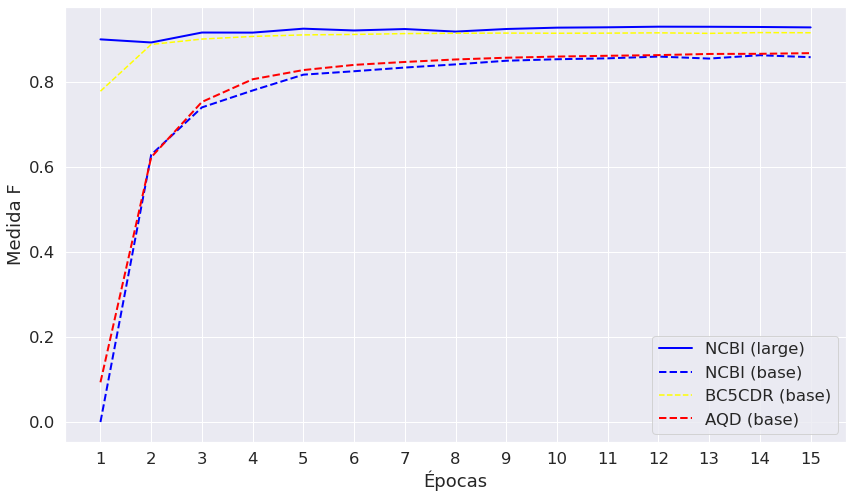

In [23]:
# f1_ncbi_base = [0.8465767116441779,0.8501498501498502,0.8677685950413223,0.8663212435233161,0.8709511568123393,0.8554033485540335,0.8675940236991242,0.8708183221821924,0.8671113391482812,0.8637059724349159,0.8770833333333333,0.8821410190427175, 0.8789283874291602,0.8712972420837589,0.8708524757529351]
f1_ncbi_base_lr_1e5 = [0.0,0.6286329386437028,0.7401267674305216,0.7799113737075333,0.8171513060620996,0.8252092565238799,0.8339117501239466,0.8413320274240941,0.8499005964214713,0.8534525583705912,0.8555831265508684,0.8596926127912742,0.8550148957298908,0.8628428927680799,0.8582794629537543]
f1_ncbi_large = [0.9001788908765653,0.892882818116463,0.9162595952547105,0.9160571229536747,0.9253314724354501,0.9211160868067517,0.9244819107832806,0.9184931506849314,0.9245674740484429,0.9277357192016517,0.9285714285714285,0.93000693000693,0.9298123697011813,0.9293139293139292,0.9283489096573209 ]

f_measure_BC5CDR_base = [0.7782979654342594, 0.888265306122449, 0.9008575170024924, 0.907081526821389, 0.9107081765309615, 0.9117572047946954, 0.9137505321413367, 0.9144952876455287, 0.914933675652546, 0.9146012585077695, 0.9148281169830682, 0.9155369285378265, 0.9142954797915065, 0.9161052225035403, 0.9157462111482149]
f_measure_AQD_base = [0.0934509489441326, 0.622810943047227, 0.7530149405484792, 0.8063093901470547, 0.8279843119924875, 0.8401563236231602, 0.8470425649530128, 0.8528931113757859, 0.8569998609759489,  0.8597056373229658, 0.8615915030862482, 0.8631380276999084, 0.8658901086622531, 0.8662015071169411, 0.8677896030615381]

# import numpy as np
import seaborn as sns
# import pandas as pd
import matplotlib.pyplot as plt

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (14,8)


# plt.xticks(np.arange(len(precisions)), np.arange(1, len(precisions)+1))

plt.plot(f1_ncbi_large, 'b-', color='blue', label="NCBI (large)", linewidth=2)
plt.plot(f1_ncbi_base_lr_1e5, '--', color='blue', label="NCBI (base)", linewidth=2)

plt.plot(f_measure_BC5CDR_base, '--', color='yellow', label="BC5CDR (base)")
# plt.plot(f_measure_BC5CDR_large, '--', color='blue', label="BC5CDR (large)",linewidth=2)

plt.plot(f_measure_AQD_base, '--', color='red', label="AQD (base)", linewidth=2)
# plt.plot(f_measure_AQD_large, '--', color ='red', label="AQD (large)", linewidth=2)


# plt.plot(f_measure_BioNLP13CG_base, 'y-', color ='yellow', label="BioNLP13CG (base)", linewidth=2)
# plt.plot(f_measure_BioNLP13CG_large, '--', color ='yellow', label="BioNLP13CG (large)", linewidth=2)

xs = []
[xs.append(x) for x in range(1,16)]
# print(np.arange(0, 15, step=1))
plt.xticks(np.arange(0, 15), xs)


# plt.title("Performance so")
plt.xlabel("Épocas")
plt.ylabel("Medida F")

plt.legend()

plt.savefig('performance.eps', format='eps')
plt.show()


## CSCW fig

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


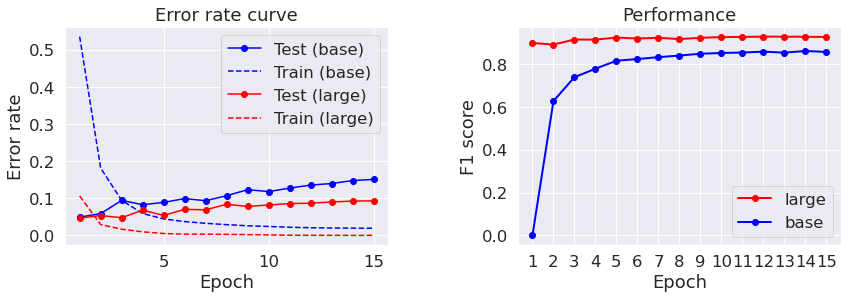

In [52]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
# plt.rcParams.update({'font.size': 5})
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,4)

indices = np.arange(1, 16, step=1)
xs = []
[xs.append(x) for x in range(1,16)]
plt.xticks(np.arange(0, 15), xs)



# NCBI
# perda_treino=[0.242, 0.0422, 0.0222, 0.0135, 0.008, 0.0054, 0.0037, 0.0027, 0.0021, 0.0016, 0.0013, 0.0013, 0.0009, 0.0008, 0.0007]
# perda_treino_lr_5e-5 = [0.0605,0.0253,0.0144,0.0084,0.0065,0.0052,0.0041,0.0025,0.002,0.002,0.0008,0.0004,0.0004,0.0005,0.0003]
perda_treino_lr_1e5 = [0.5358,0.1815,0.0943,0.0591,0.0444,0.0372,0.0326,0.029,0.0259,0.024,0.022,0.0207,0.02,0.0195,0.0192]

# perda_teste = [0.11346697807312012, 0.055551912635564804, 0.04354406148195267, 0.042623959481716156, 0.043783463537693024, 0.048358239233493805, 0.051372312009334564, 0.05360308289527893,0.0572509728372097, 0.0632767304778099, 0.06852328032255173,0.07245273888111115,0.07431916147470474, 0.07688311487436295, 0.07955699414014816]
perda_teste = [0.04934130981564522,0.05874865874648094,0.09429509192705154,0.08273377269506454,0.08888518065214157,
               0.09925306588411331,0.0934862568974495,0.10709076374769211,0.12316763401031494,0.11807524412870407,
               0.12752602994441986,0.1355993002653122,0.13980543613433838,0.14783574640750885,0.15096993744373322]

perda_treino_large=[0.1062, 0.0293, 0.0168, 0.0095, 0.0051, 0.0033, 0.0032, 0.0028, 0.002, 0.0014, 0.0004, 0.0003, 0.0002, 0.0001, 0.0001]
perda_teste_large = [0.04673603177070618, 0.05343064293265343, 0.04774734377861023, 0.06812098622322083,0.0537053644657135, 0.07026097178459167, 0.06891816854476929, 0.08388172090053558,0.07797511667013168, 0.08200062811374664, 0.08584363758563995, 0.08676780760288239,0.09008458256721497, 0.09243257343769073, 0.09316516667604446]

df1treino = pd.DataFrame({'x': indices, 'perda': perda_treino_lr_1e5})
df1teste = pd.DataFrame({'x': indices, 'perda': perda_teste})
df1treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large})
df1teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large})

ax[0].plot(df1teste['x'], df1teste['perda'], 'b-o', color='blue', label='Test (base)')
ax[0].plot(df1treino['x'], df1treino['perda'], '--', color='blue', label='Train (base)')

ax[0].plot(df1teste_large['x'], df1teste_large['perda'], 'r-o', color='red', label='Test (large)')
ax[0].plot(df1treino_large['x'], df1treino_large['perda'], '--', color='red', label='Train (large)')

ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Error rate")
ax[0].legend()
ax[0].title.set_text("Error rate curve")


# BC5CDR disease/quemical
perda_treino2=[0.3009, 0.0634, 0.0379, 0.0246, 0.0165, 0.0115, 0.008, 0.0063, 0.0046, 0.0037, 0.0028, 0.0024, 0.0024, 0.002, 0.002] 
perda_teste2 = [0.13631464540958405, 0.07899278402328491, 0.07369395345449448, 0.07181507349014282, 0.07434109598398209, 0.08095277100801468, 0.08824150264263153, 0.09242662787437439, 0.09672744572162628, 0.10157956928014755, 0.10728141665458679, 0.11211907118558884, 0.11758284270763397, 0.11825259774923325, 0.12289009988307953]
perda_treino_large2 = [0.1129, 0.0392, 0.0204, 0.0103, 0.0064,0.0044, 0.0037, 0.0041, 0.0014, 0.0022, 0.0017, 0.0026, 0.0019, 0.0023, 0.0031]
perda_teste_large2 = [0.07448294013738632, 0.07745637744665146, 0.09494827687740326, 0.10143187642097473,0.11567673832178116, 0.11996781826019287, 0.12309041619300842, 0.11486415565013885,0.13288089632987976, 0.13886398077011108, 0.1426146775484085, 0.15126049518585205,0.1508987993001938, 0.15413853526115417, 0.15471462905406952]

df2treino = pd.DataFrame({'x': indices, 'perda': perda_treino2})
df2teste = pd.DataFrame({'x': indices, 'perda': perda_teste2})
df2treino_large = pd.DataFrame({'x': indices, 'perda': perda_treino_large2})
df2teste_large = pd.DataFrame({'x': indices, 'perda': perda_teste_large2})

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("F1 score")
ax[1].legend()
ax[1].title.set_text("Performance")


f1_base = [0.0,0.6286329386437028,0.7401267674305216,0.7799113737075333,0.8171513060620996,0.8252092565238799,0.8339117501239466,0.8413320274240941,0.8499005964214713,0.8534525583705912,0.8555831265508684,0.8596926127912742,0.8550148957298908,0.8628428927680799,0.8582794629537543]
f1_large = [0.9001788908765653,0.892882818116463,0.9162595952547105,0.9160571229536747,0.9253314724354501,0.9211160868067517,0.9244819107832806,0.9184931506849314,0.9245674740484429,0.9277357192016517,0.9285714285714285,0.93000693000693,0.9298123697011813,0.9293139293139292,0.9283489096573209 ]



# plt.xticks(np.arange(len(precisions)), np.arange(1, len(precisions)+1))

plt.plot(f1_large, 'b-o', color='red', label="large", linewidth=2)
plt.plot(f1_base, 'b-o', color='blue', label="base", linewidth=2)

# plt.xlabel("Épocas")
# plt.ylabel("Medida F")

plt.legend()



plt.savefig('error_and_performance.eps', format='eps')
